<a href="https://colab.research.google.com/github/AleemRahil/GAMs_for_Pricing_Optimization_Strategy/blob/main/GAMs_for_Pricing_Optimization_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PYTHON GAM PRICE OPTIMIZATION

## PART 1: EXPECTILE GAM PRIMER

### Showcases the use of Expectile GAM (Primer for Price Optimization)

In [2]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 5.6 MB/s eta 0:00:00


In [13]:
# prompt: import numpy, pandas, plt pygam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import s, ExpectileGAM



In [299]:
# Data Generation
np.random.seed(0)
n = 10000
price = np.sort(np.random.exponential(scale=100, size =n))
quantity = 1000 - 5*price + np.random.normal(loc=0, scale=50, size=n)
quantity = quantity.clip(min=0)

In [300]:
# Add Outliers
n_outliers = 10
outlier_prices = np.random.uniform(5, 50, n_outliers)
outlier_quantity = 1100 + np.random.normal(loc=0, scale=50, size=n_outliers)
price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

In [301]:
# Add Outliers
n_outliers = 10
outlier_prices = np.random.uniform(51, 100, n_outliers)
outlier_quantity = 900 + np.random.normal(loc=0, scale=50, size=n_outliers)
price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

In [302]:
# Create a list of products
products = ["Standard Case | iPhone 15 Pro Max", "Premium Case | iPhone 15 Pro Max", "Standard Case | iPhone 15 Pro", "Premium Case | iPhone 15 Pro"]

# Create a list of events
events = ["No Promo", "Black Friday", "New iPhone", "Christmas", "The Big Game"]

In [303]:
import random


In [304]:
df = pd.DataFrame({
    'price': price,
    'quantity_sold': quantity.astype(int)
})


In [305]:
df

,price,quantity_sold
0,0.007245,963
1,0.007370,1028
2,0.015039,978
3,0.025387,994
4,0.030658,883
...,...,...
10015,87.773496,906
10016,53.569882,912
10017,83.376840,813
10018,86.313284,875


In [306]:
df['product'] = pd.DataFrame(random.choices(products, k=10020))
df['event'] = pd.DataFrame(random.choices(events, k=10020))

In [307]:
# Filer out prices less than 5
df = df[df['price'] >= 5]

In [308]:
df

,price,quantity_sold,product,event
513,5.038587,1028,Premium Case | iPhone 15 Pro Max,Black Friday
514,5.047327,1020,Premium Case | iPhone 15 Pro Max,New iPhone
515,5.054122,922,Standard Case | iPhone 15 Pro,Black Friday
516,5.057938,986,Premium Case | iPhone 15 Pro Max,The Big Game
517,5.060821,962,Premium Case | iPhone 15 Pro,Black Friday
...,...,...,...,...
10015,87.773496,906,Standard Case | iPhone 15 Pro Max,New iPhone
10016,53.569882,912,Standard Case | iPhone 15 Pro Max,No Promo
10017,83.376840,813,Premium Case | iPhone 15 Pro Max,Black Friday
10018,86.313284,875,Standard Case | iPhone 15 Pro,New iPhone


In [309]:
# prompt: save df to a csv file in the path data/price_optimisation.csv

df.to_csv('data/price_optimisation.csv', index=False)


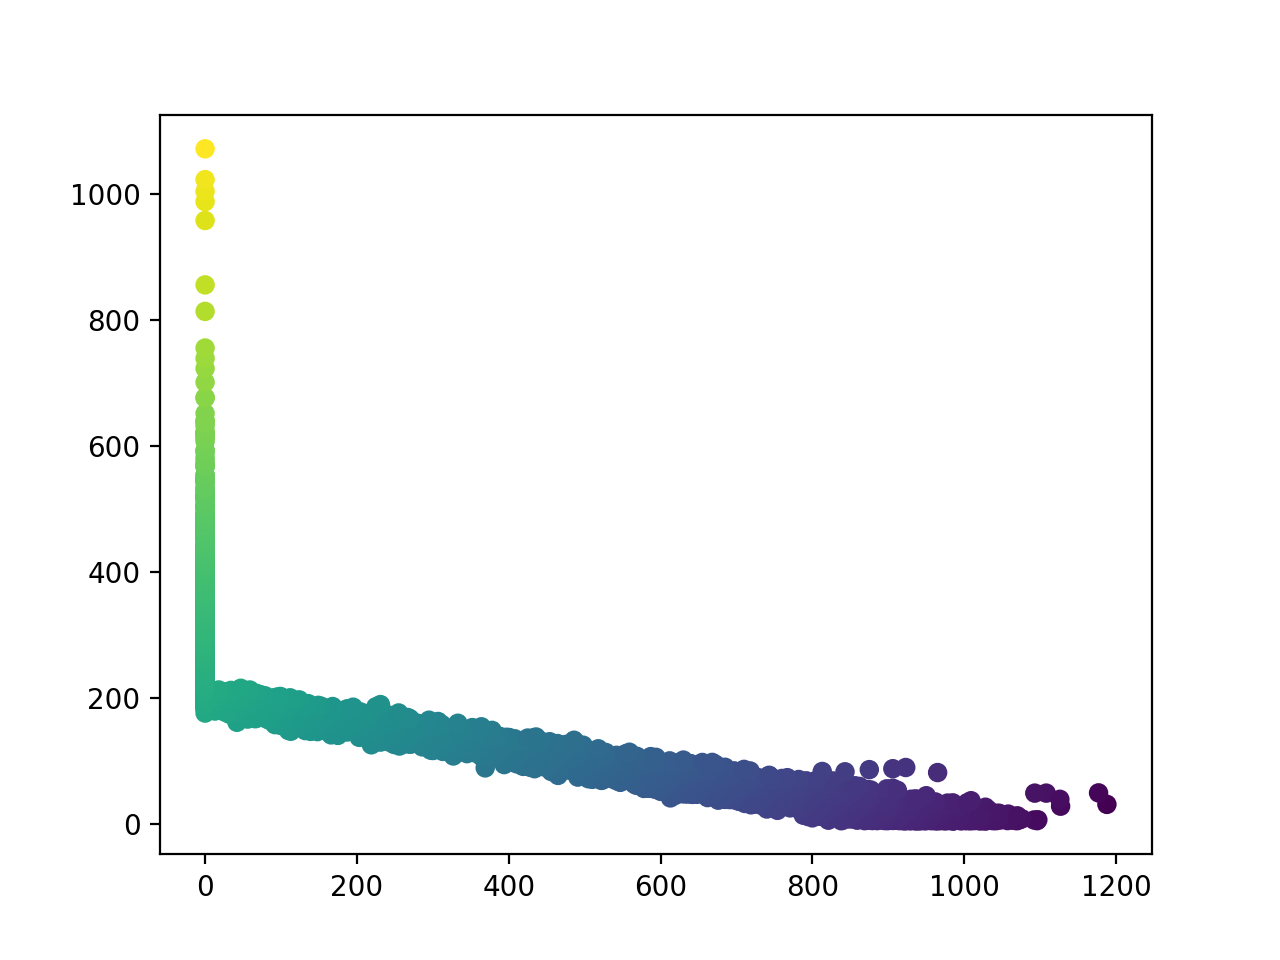

In [310]:
# @title Price and Quantity Spread vs Mean

import matplotlib.pyplot as plt
_ = plt.scatter(df['quantity_sold'], df['price'], c=df['price'] - df['quantity_sold'])

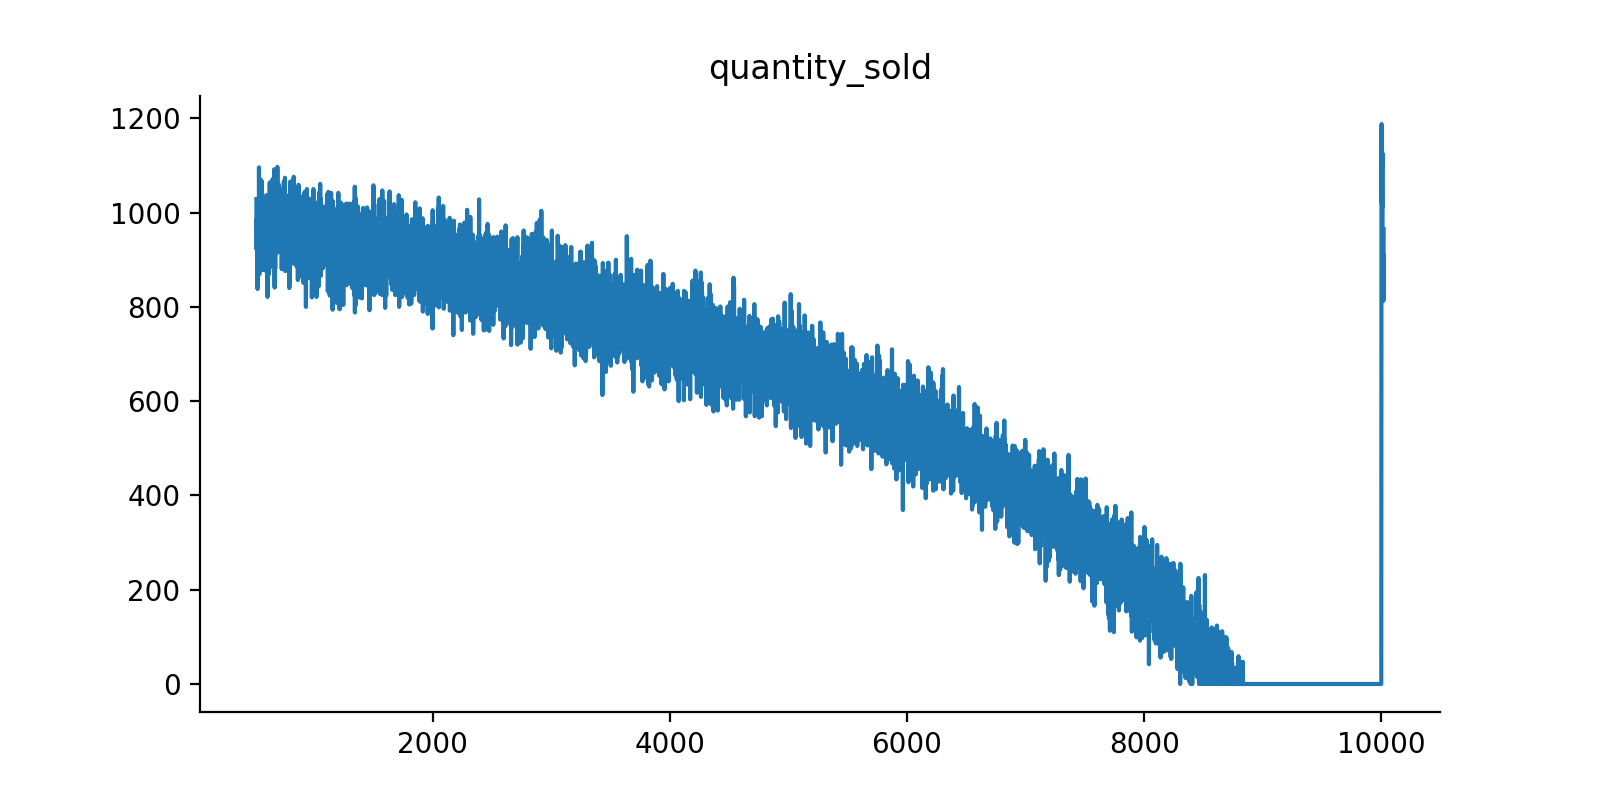

In [311]:
# @title Quantity

from matplotlib import pyplot as plt
df['quantity_sold'].plot(kind='line', figsize=(8, 4), title='quantity_sold')
plt.gca().spines[['top', 'right']].set_visible(False)

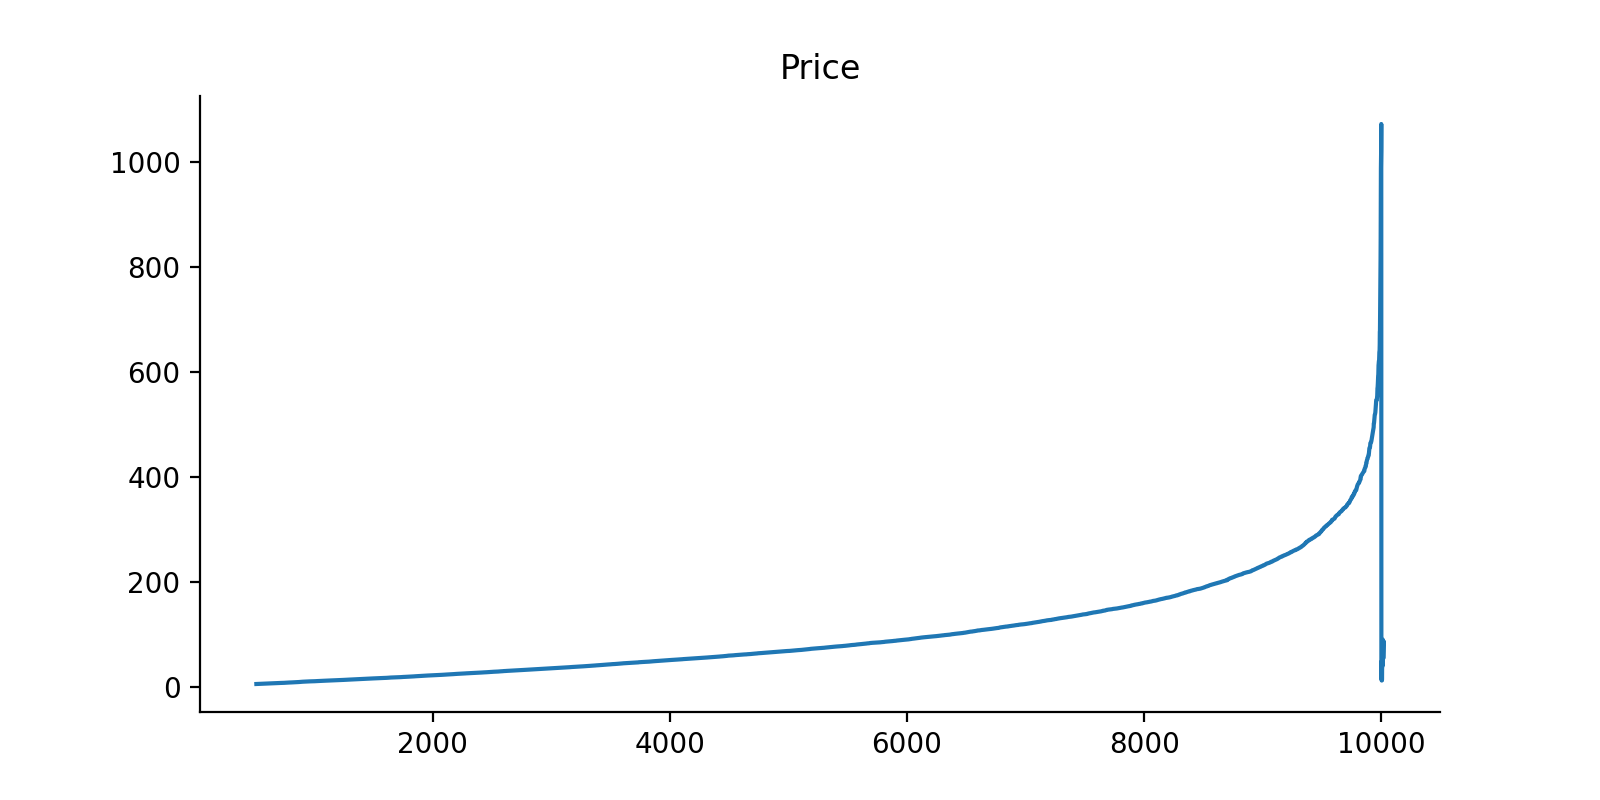

In [312]:
# @title Price

from matplotlib import pyplot as plt
df['price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: ylabel='Frequency'>

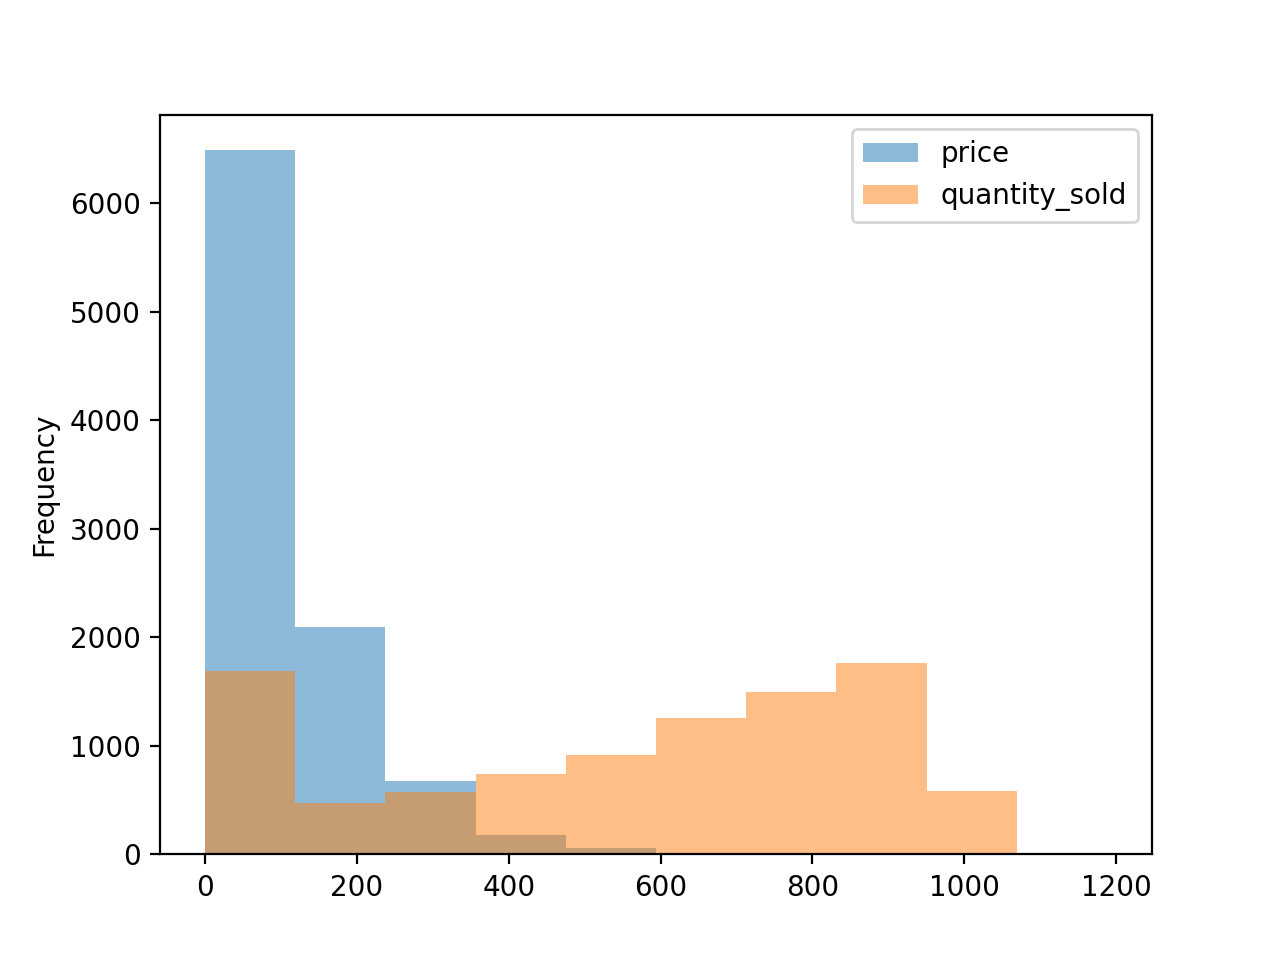

In [313]:
# @title Distribution of Price vs Quantity

df.plot.hist(column=['price', 'quantity_sold'], alpha=0.5)

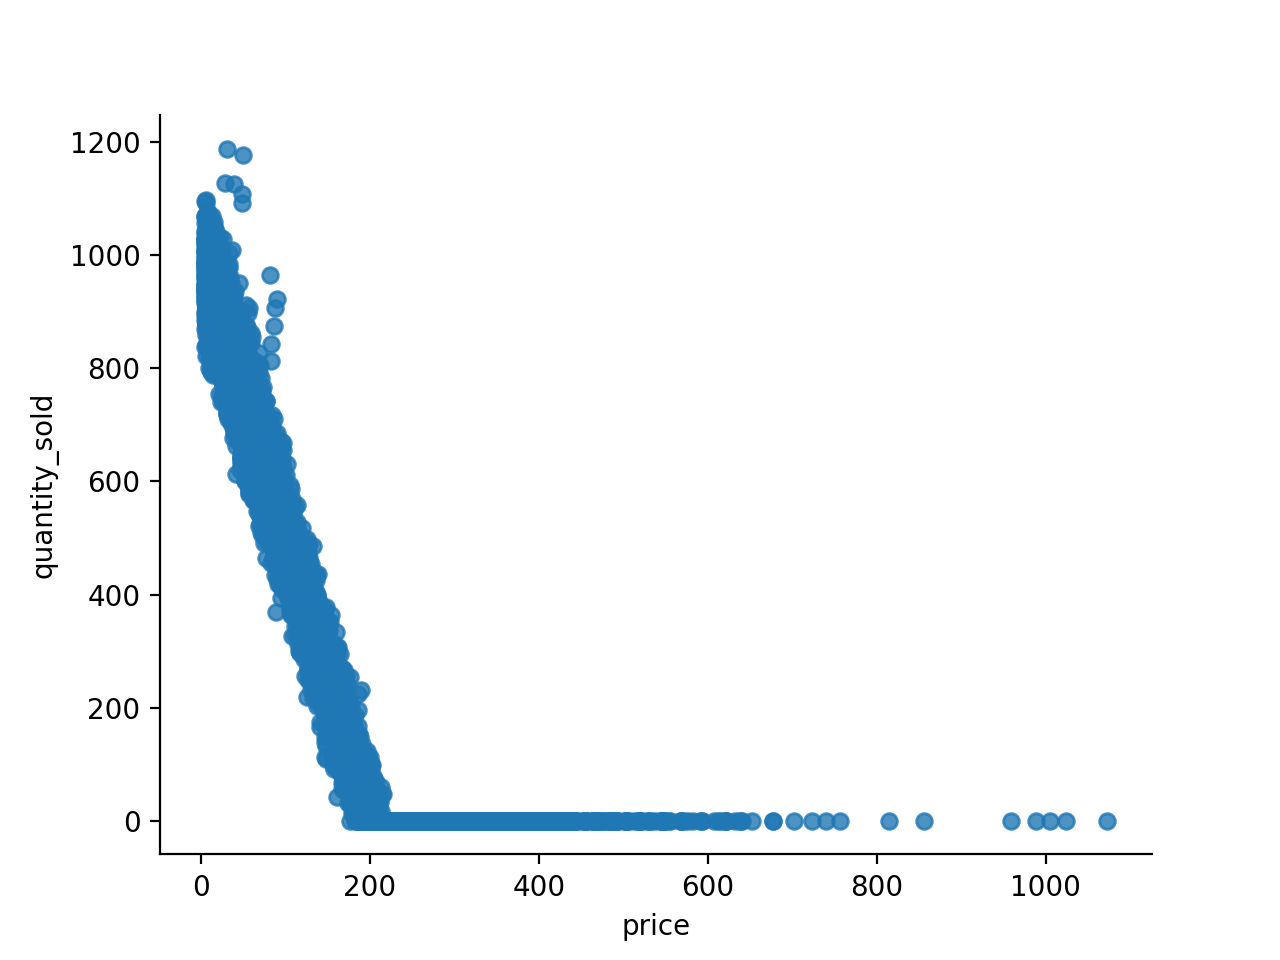

In [314]:
# @title Price vs Quantity

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='quantity_sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

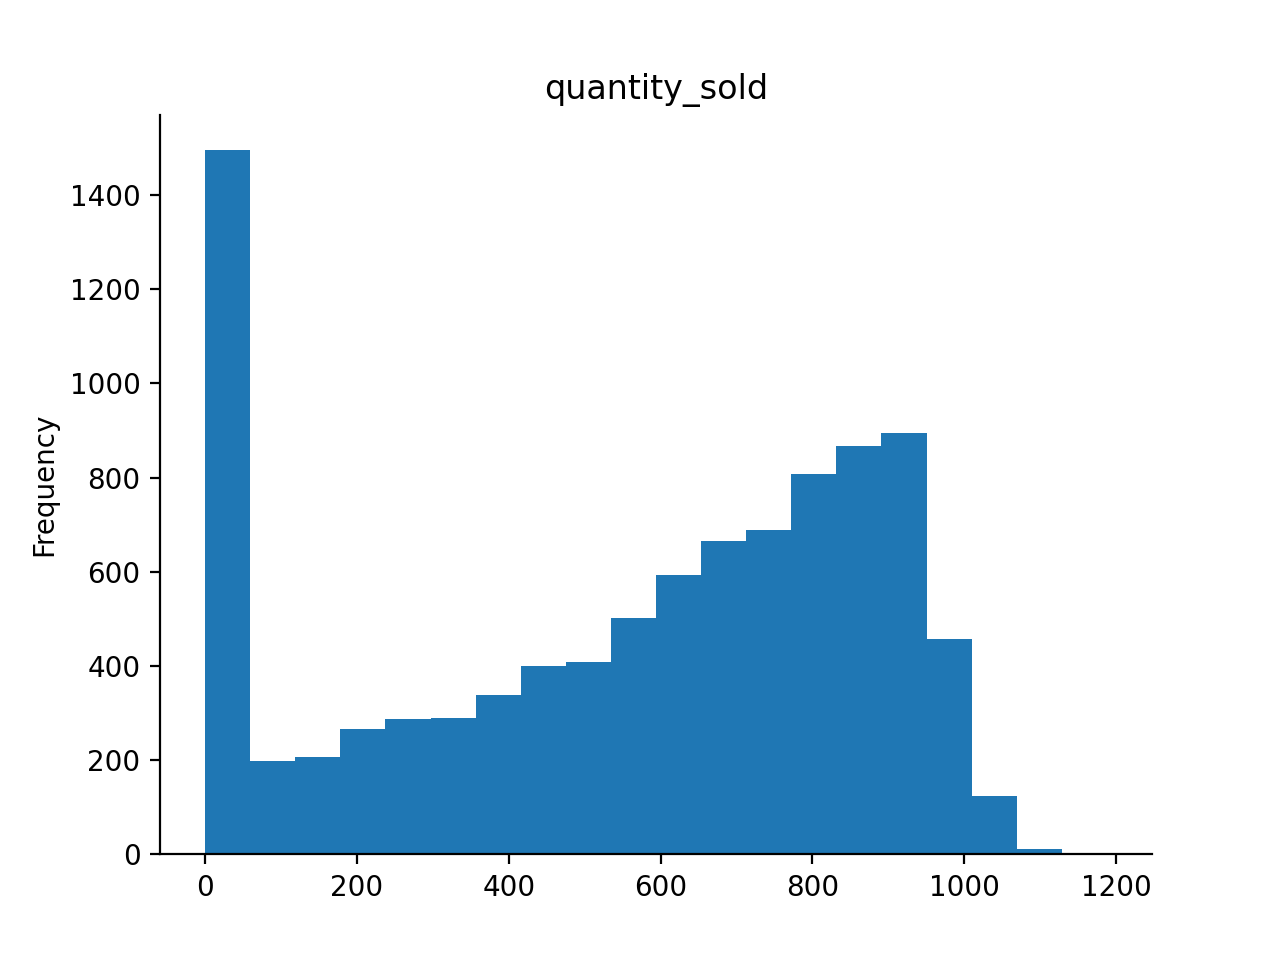

In [315]:
# @title Quantity

from matplotlib import pyplot as plt
df['quantity_sold'].plot(kind='hist', bins=20, title='quantity_sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

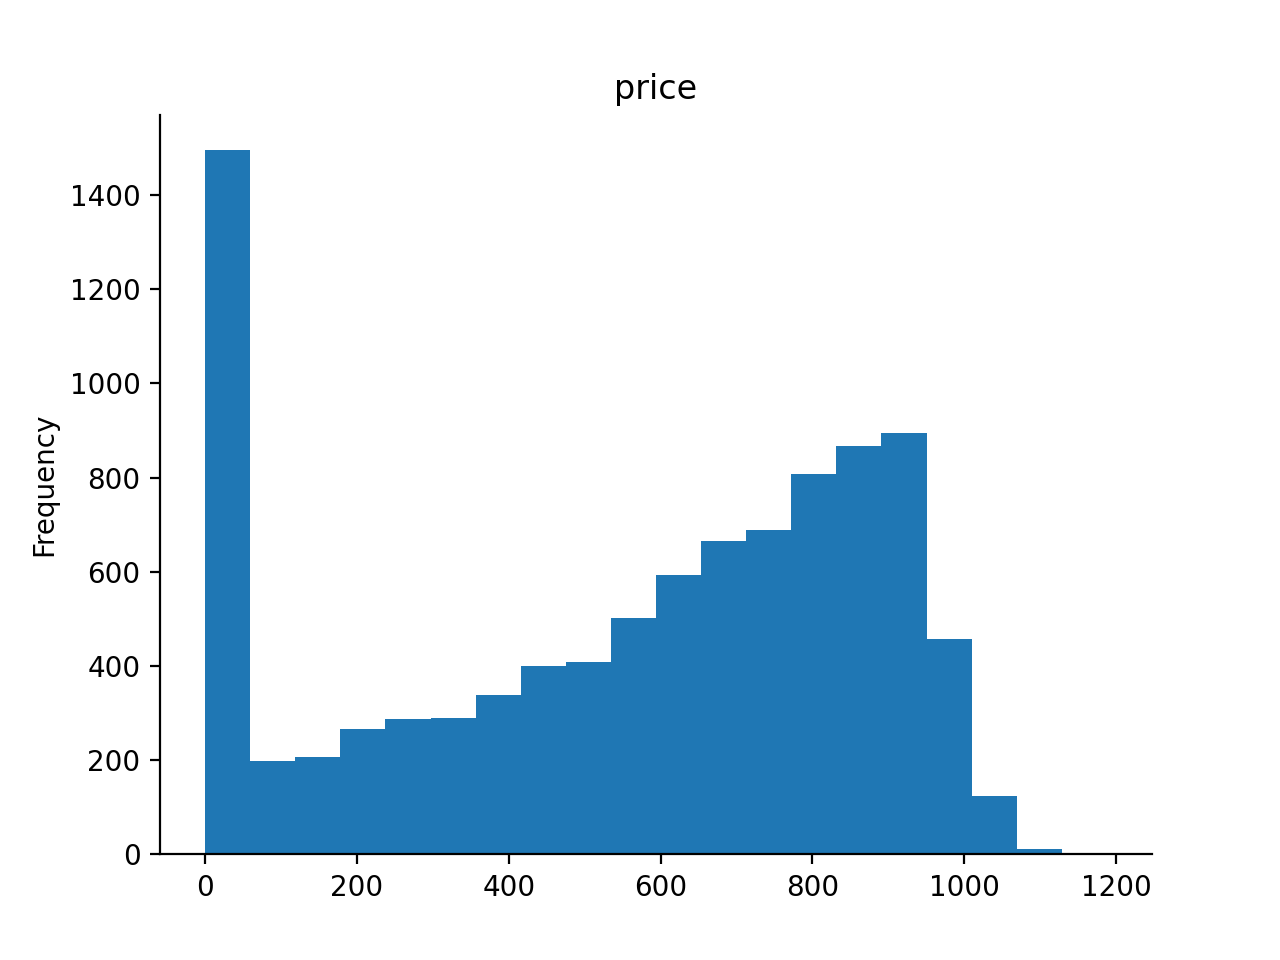

In [316]:
# @title Price

from matplotlib import pyplot as plt
df['quantity_sold'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Modeling

In [317]:
# Reshape Data
X = df[['price']]
y = df['quantity_sold']

# Quantile GAMs
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

for q in quantiles:
  gam = ExpectileGAM(s(0), expectile=q)
  gam. fit(X,y)
  gam_results[q] = gam

In [318]:
gam_results

{0.025: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.025, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

# Visualization

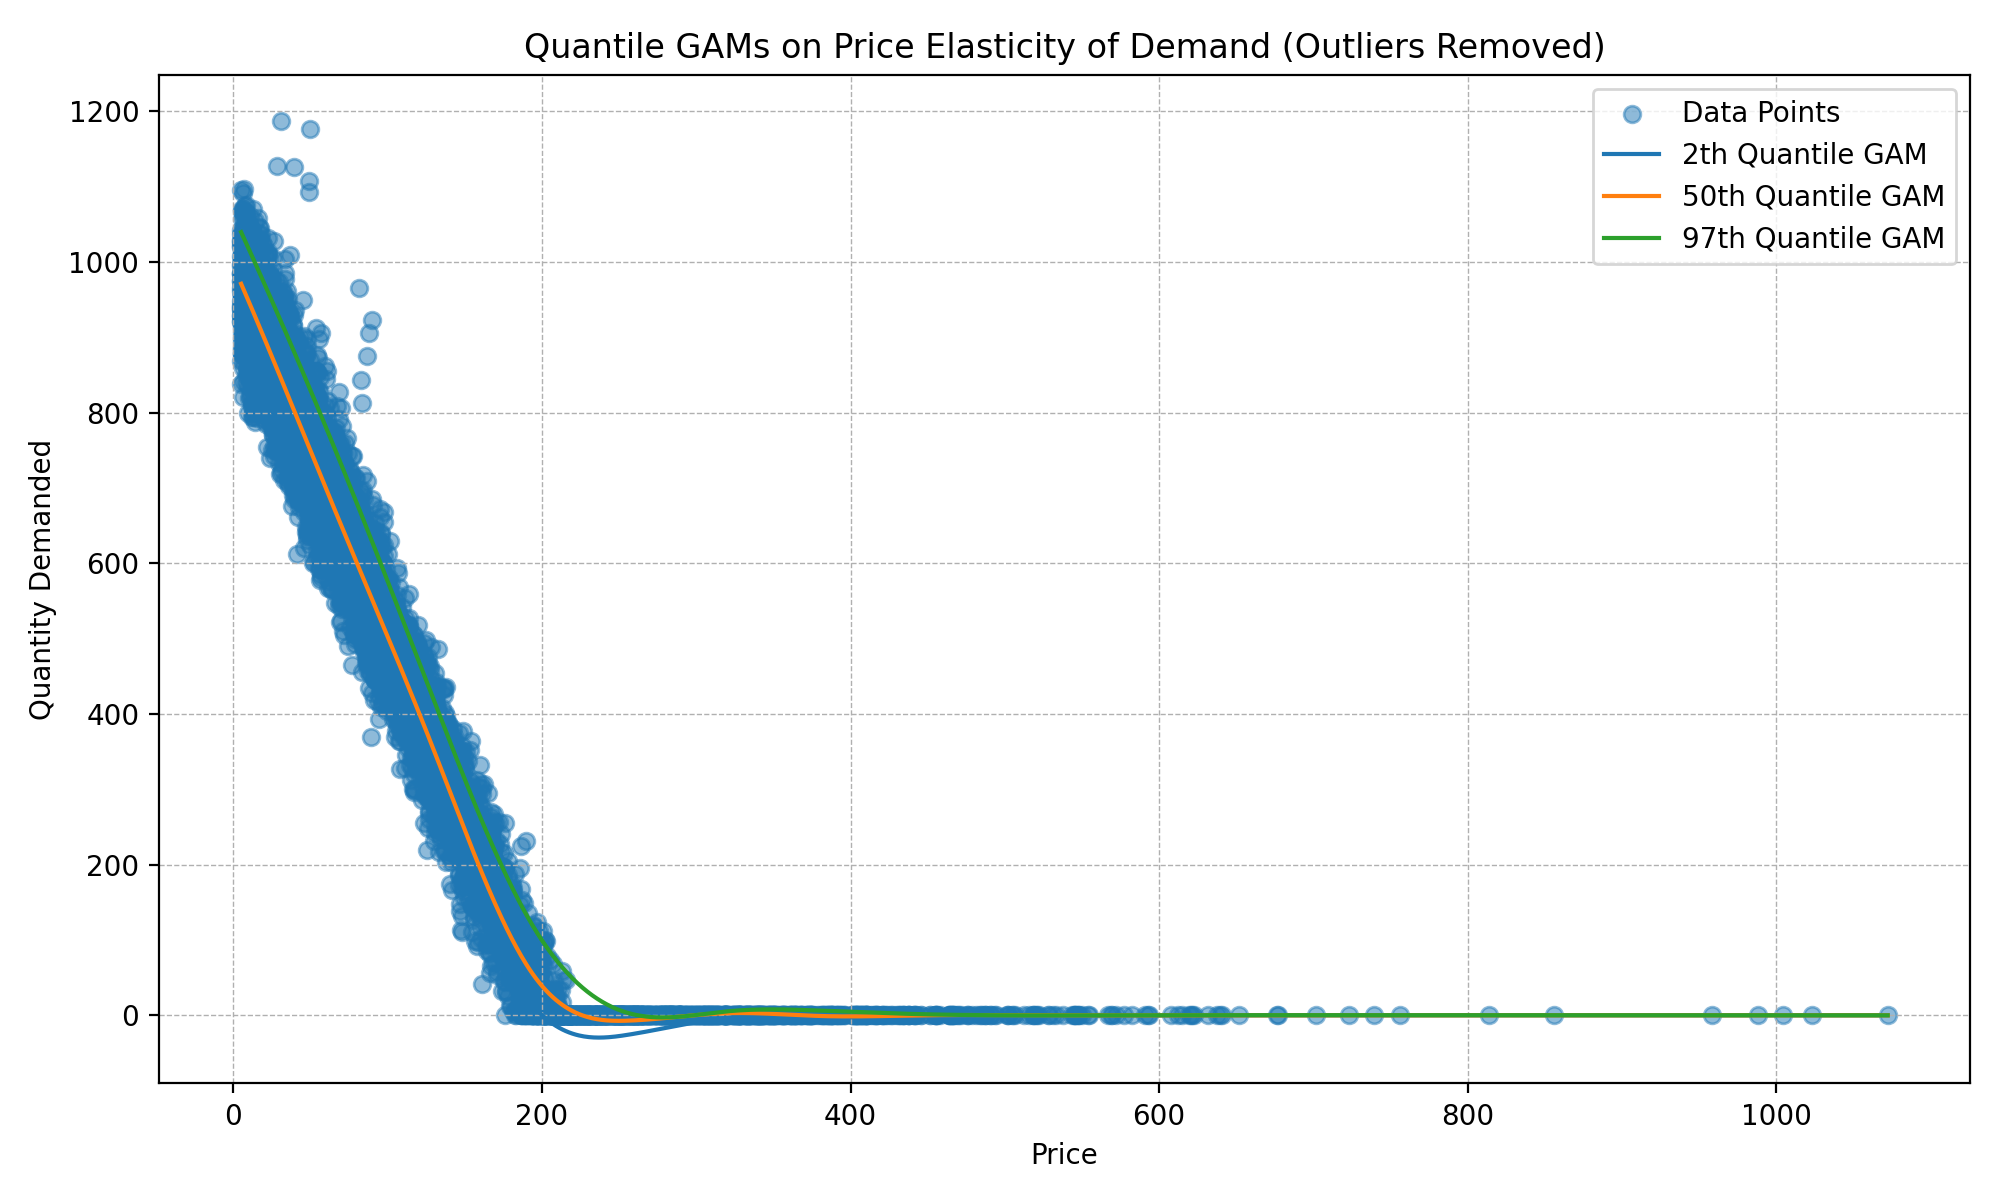

In [319]:
# Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(df['price'], df['quantity_sold'], alpha=0.5, label='Data Points')

# Plot Quantile GAMs
XX = np.linspace(df['price'].min(), df['price'].max(), 1000).reshape(-1,1)
for q, gam in gam_results.items():
  plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Quantile GAM')

# Add titles and labels
plt.xlabel('Price')
plt.ylabel('Quantity Demanded')
plt.title('Quantile GAMs on Price Elasticity of Demand (Outliers Removed)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Price Optimization
## PART 2: EXPECTILE GAM PRICE OPTIMIZATION

In [320]:
pip install pytimetk

In [321]:
# Data Analysis and Modeling
import statsmodels.api as sm
from pygam import GAM, ExpectileGAM, s, l, f
from sklearn.preprocessing import LabelEncoder

# Visualisation
import plotly.express as px
from plotnine import *
import pytimetk as tk
import textwrap

In [322]:
# Load Data
data = pd.read_csv('/content/data/price_optimisation.csv')

In [323]:
data

,price,quantity_sold,product,event
0,5.038587,1028,Premium Case | iPhone 15 Pro Max,Black Friday
1,5.047327,1020,Premium Case | iPhone 15 Pro Max,New iPhone
2,5.054122,922,Standard Case | iPhone 15 Pro,Black Friday
3,5.057938,986,Premium Case | iPhone 15 Pro Max,The Big Game
4,5.060821,962,Premium Case | iPhone 15 Pro,Black Friday
...,...,...,...,...
9502,87.773496,906,Standard Case | iPhone 15 Pro Max,New iPhone
9503,53.569882,912,Standard Case | iPhone 15 Pro Max,No Promo
9504,83.376840,813,Premium Case | iPhone 15 Pro Max,Black Friday
9505,86.313284,875,Standard Case | iPhone 15 Pro,New iPhone


In [324]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,9507.0,NaN,NaN,NaN,104.194717,99.954664,5.038587,33.305507,73.266989,143.066927,1072.227872
quantity_sold,9507.0,NaN,NaN,NaN,549.66593,327.833315,0.0,281.0,630.0,830.0,1188.0
product,9507,4,Premium Case | iPhone 15 Pro,2455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,9507,5,Black Friday,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.0 Data Preparation

In [325]:
data['is_event'] = (data['event'] != "No Promo").astype(int).astype(str)

In [326]:
data['revenue'] = data['price'] * data['quantity_sold']

In [327]:
data

,price,quantity_sold,product,event,is_event,revenue
0,5.038587,1028,Premium Case | iPhone 15 Pro Max,Black Friday,1,5179.667347
1,5.047327,1020,Premium Case | iPhone 15 Pro Max,New iPhone,1,5148.273308
2,5.054122,922,Standard Case | iPhone 15 Pro,Black Friday,1,4659.900336
3,5.057938,986,Premium Case | iPhone 15 Pro Max,The Big Game,1,4987.127322
4,5.060821,962,Premium Case | iPhone 15 Pro,Black Friday,1,4868.509796
...,...,...,...,...,...,...
9502,87.773496,906,Standard Case | iPhone 15 Pro Max,New iPhone,1,79522.787188
9503,53.569882,912,Standard Case | iPhone 15 Pro Max,No Promo,0,48855.731953
9504,83.376840,813,Premium Case | iPhone 15 Pro Max,Black Friday,1,67785.370528
9505,86.313284,875,Standard Case | iPhone 15 Pro,New iPhone,1,75524.123271


### EDA

#### Trends: Price vs Quantity Sold

In [328]:
fig = px.scatter(
    data,
    x='price',
    y='quantity_sold',
    color = 'product',
    opacity=0.6,
    trendline = 'lowess',
    trendline_color_override='blue',
    template='none',
    title='Product Sales: Price vs Quantity Analysis',
    width=800,
    height=600
).update_traces(
    marker=dict(size=7),
    hoverlabel=dict(font=dict(size=10))
).update_layout(
    legend_title_text = 'Product',
    title_font=dict(size=16),
    legend_font=dict(size=10)
).update_xaxes(
    title_text='Price',
    title_font=dict(size=10),
    tickfont=dict(size=10)
).update_yaxes(
    title_text='Quantity Sold',
    title_font=dict(size=10),
    tickfont=dict(size=10)
)

In [329]:
fig

#### EVENT ANALYSIS (OUTLIERS)

In [330]:
# Scatter Plot
fig = px.scatter(
    data,
    x='price',
    y='quantity_sold',
    color = 'event',
    facet_col = 'product',
    facet_col_wrap=2,
    facet_col_spacing=0.1,
    facet_row_spacing=0.1,
    opacity=0.6,
    trendline = 'lowess',
    trendline_color_override='blue',
    template='none',
    title='Product Sales: Event Analysis',
    width=800,
    height=700
).update_traces(
    marker=dict(size=7),
    hoverlabel=dict(font=dict(size=10))
).update_layout(
    legend_title_text = 'Product',
    title_font=dict(size=16),
    legend_font=dict(size=10)
).update_xaxes(
    title_text='Price',
    title_font=dict(size=10),
    tickfont=dict(size=10)
).update_yaxes(
    title_text='Quantity Sold',
    title_font=dict(size=10),
    tickfont=dict(size=10)
)

for annotation in fig['layout']['annotations']:
  annotation['font'] = dict(size=10)

fig.for_each_xaxis(lambda axis: axis.update(showticklabels=True))
fig.for_each_yaxis(lambda axis: axis.update(showticklabels=True))

In [331]:
fig

#### Modeling Event Impact

In [332]:
df_encoded = data.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['event', 'product'], drop_first=False)

In [333]:
colnames_event = df_encoded.columns[df_encoded.columns.str.startswith('event')].tolist()

In [334]:
df_encoded[colnames_event] = df_encoded[colnames_event].astype(int)

In [335]:
colnames_product = df_encoded.columns[df_encoded.columns.str.startswith('product')].tolist()

In [336]:
df_encoded[colnames_product] = df_encoded[colnames_product].astype(int)

In [337]:
df_encoded

,price,quantity_sold,is_event,revenue,event_Black Friday,event_Christmas,event_New iPhone,event_No Promo,event_The Big Game,product_Premium Case | iPhone 15 Pro,product_Premium Case | iPhone 15 Pro Max,product_Standard Case | iPhone 15 Pro,product_Standard Case | iPhone 15 Pro Max
0,5.038587,1028,1,5179.667347,1,0,0,0,0,0,1,0,0
1,5.047327,1020,1,5148.273308,0,0,1,0,0,0,1,0,0
2,5.054122,922,1,4659.900336,1,0,0,0,0,0,0,1,0
3,5.057938,986,1,4987.127322,0,0,0,0,1,0,1,0,0
4,5.060821,962,1,4868.509796,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9502,87.773496,906,1,79522.787188,0,0,1,0,0,0,0,0,1
9503,53.569882,912,0,48855.731953,0,0,0,1,0,0,0,0,1
9504,83.376840,813,1,67785.370528,1,0,0,0,0,0,1,0,0
9505,86.313284,875,1,75524.123271,0,0,1,0,0,0,0,1,0


In [338]:
X = df_encoded[['price'] + colnames_event + colnames_product]

In [339]:
X = sm.add_constant(X) # Adds a constant to the model (intercept)

In [340]:
y = df_encoded['quantity_sold']

In [341]:
model = sm.OLS(y, X).fit()

In [342]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quantity_sold   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     4075.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:53:26   Log-Likelihood:                -61481.
No. Observations:                9507   AIC:                         1.230e+05
Df Residuals:                    9498   BIC:                         1.230e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                       586.5196      1.593    368.295      0.000     583.398     589.641
price                                        -2.8863      0.016   -180.507      0.000      -2.918      -2.855
event_Black Friday                          115.6956      3.164     36.564      0.000     109.493     121.898
event_Christmas                             118.4532      3.221     36.774      0.000     112.139     124.767
event_New iPhone                            114.5109      3.190     35.894      0.000     108.257     120.765
event_No Promo                              113.6615      3.232     35.162      0.000     107.325     119.998
event_The Big Game                          124.1984      3.255     38.151      0.000     117.817     130.580
product_Premium Case | iPhone 15 Pro        146.1763      2.761     52.943      0.000     140.764     151.588
product_Premium Case | iPhone 15 Pro Max    144.3884      2.830     51.028      0.000     138.842     149.935
product_Standard Case | iPhone 15 Pro       146.1442      2.792     52.347      0.000     140.672     151.617
product_Standard Case | iPhone 15 Pro Max   149.8108      2.805     53.403      0.000     144.312     155.310
==============================================================================
Omnibus:                     5896.223   Durbin-Watson:                   0.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225388.249
Skew:                           2.397   Prob(JB):                         0.00
Kurtosis:                      26.367   Cond. No.                     1.63e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.42e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [343]:
model.params

const                                        586.519642
price                                         -2.886346
event_Black Friday                           115.695632
event_Christmas                              118.453223
event_New iPhone                             114.510877
event_No Promo                               113.661509
event_The Big Game                           124.198400
product_Premium Case | iPhone 15 Pro         146.176275
product_Premium Case | iPhone 15 Pro Max     144.388375
product_Standard Case | iPhone 15 Pro        146.144199
product_Standard Case | iPhone 15 Pro Max    149.810793
dtype: float64

In [344]:
params_df = pd.DataFrame(model.params).T

In [345]:
params_df

,const,price,event_Black Friday,event_Christmas,event_New iPhone,event_No Promo,event_The Big Game,product_Premium Case | iPhone 15 Pro,product_Premium Case | iPhone 15 Pro Max,product_Standard Case | iPhone 15 Pro,product_Standard Case | iPhone 15 Pro Max
0,586.519642,-2.886346,115.695632,118.453223,114.510877,113.661509,124.1984,146.176275,144.388375,146.144199,149.810793


In [346]:
np.log((params_df['event_Black Friday'] + params_df['const']) / (params_df['event_No Promo'] + params_df['const']))

0    0.002901
dtype: float64

#### General Price Optimization: GAMs

##### PROBLEM: Prices are not Linear
##### SOLUTION: Use GAMs (Generalized Additive Models)
##### NOTES:
#####       - GAMs are like Linear Regression, but allow for non-linear relationships
#####       - NOT as useful for incorporating events (see next section)




In [347]:
# Keep the entire data as filtered
data_filtered = data.query('event == "No Promo"')

In [348]:
data_filtered

,price,quantity_sold,product,event,is_event,revenue
11,5.159972,975,Premium Case | iPhone 15 Pro Max,No Promo,0,5030.973050
13,5.182544,965,Premium Case | iPhone 15 Pro,No Promo,0,5001.155284
19,5.236021,928,Standard Case | iPhone 15 Pro Max,No Promo,0,4859.027854
31,5.309463,936,Premium Case | iPhone 15 Pro Max,No Promo,0,4969.656999
32,5.310300,916,Standard Case | iPhone 15 Pro Max,No Promo,0,4864.234482
...,...,...,...,...,...,...
9486,1072.227872,0,Premium Case | iPhone 15 Pro Max,No Promo,0,0.000000
9488,28.228996,1127,Premium Case | iPhone 15 Pro,No Promo,0,31814.078151
9495,48.984511,1093,Premium Case | iPhone 15 Pro Max,No Promo,0,53540.070530
9501,82.877074,843,Premium Case | iPhone 15 Pro Max,No Promo,0,69865.373619


In [349]:
# Create a list of unique Products
unique_products = data_filtered['product'].unique()

In [350]:
len(unique_products)

4

In [351]:
# Create an empty dataframe to store the concatenated results
all_gam_results = pd.DataFrame()

In [352]:
# Loop through each product
for product in unique_products:
  # Filter data for the current product
  product_data = data_filtered[data_filtered['product'] == product]

  X = product_data[['price']]
  y = product_data['quantity_sold']

  quantiles = [0.025, 0.5, 0.975]
  gam_results = {}

  # Fit the GAM model for the filtered data
  for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X, y)
    gam_results[f"pred_{q}"] = gam.predict(X)

  # Store the results in a dataframe with index that matches the original data
  predictions_gam = pd.DataFrame(gam_results).set_index(X.index)

  # Concatenate the results column-wise with the original data
  predictions_gam_df = pd.concat([product_data[['price', 'product', 'quantity_sold']], predictions_gam], axis =1)

  # Concatenate the results row-wise with the original data
  all_gam_results = pd.concat([all_gam_results, predictions_gam_df], axis =0)

In [353]:
all_gam_results

,price,product,quantity_sold,pred_0.025,pred_0.5,pred_0.975
11,5.159972,Premium Case | iPhone 15 Pro Max,975,899.177439,963.161992,1033.320847
31,5.309463,Premium Case | iPhone 15 Pro Max,936,898.431487,962.468032,1032.680617
36,5.383023,Premium Case | iPhone 15 Pro Max,1003,898.064434,962.126551,1032.365528
46,5.515644,Premium Case | iPhone 15 Pro Max,948,897.402706,961.510904,1031.797385
47,5.523109,Premium Case | iPhone 15 Pro Max,969,897.365459,961.476250,1031.765402
...,...,...,...,...,...,...
9447,547.570619,Standard Case | iPhone 15 Pro,0,0.224405,-0.057999,1.657136
9449,547.984006,Standard Case | iPhone 15 Pro,0,0.221803,-0.057490,1.651114
9454,568.779394,Standard Case | iPhone 15 Pro,0,0.075772,-0.032548,1.356206
9466,620.555525,Standard Case | iPhone 15 Pro,0,-0.258751,0.005267,0.724040


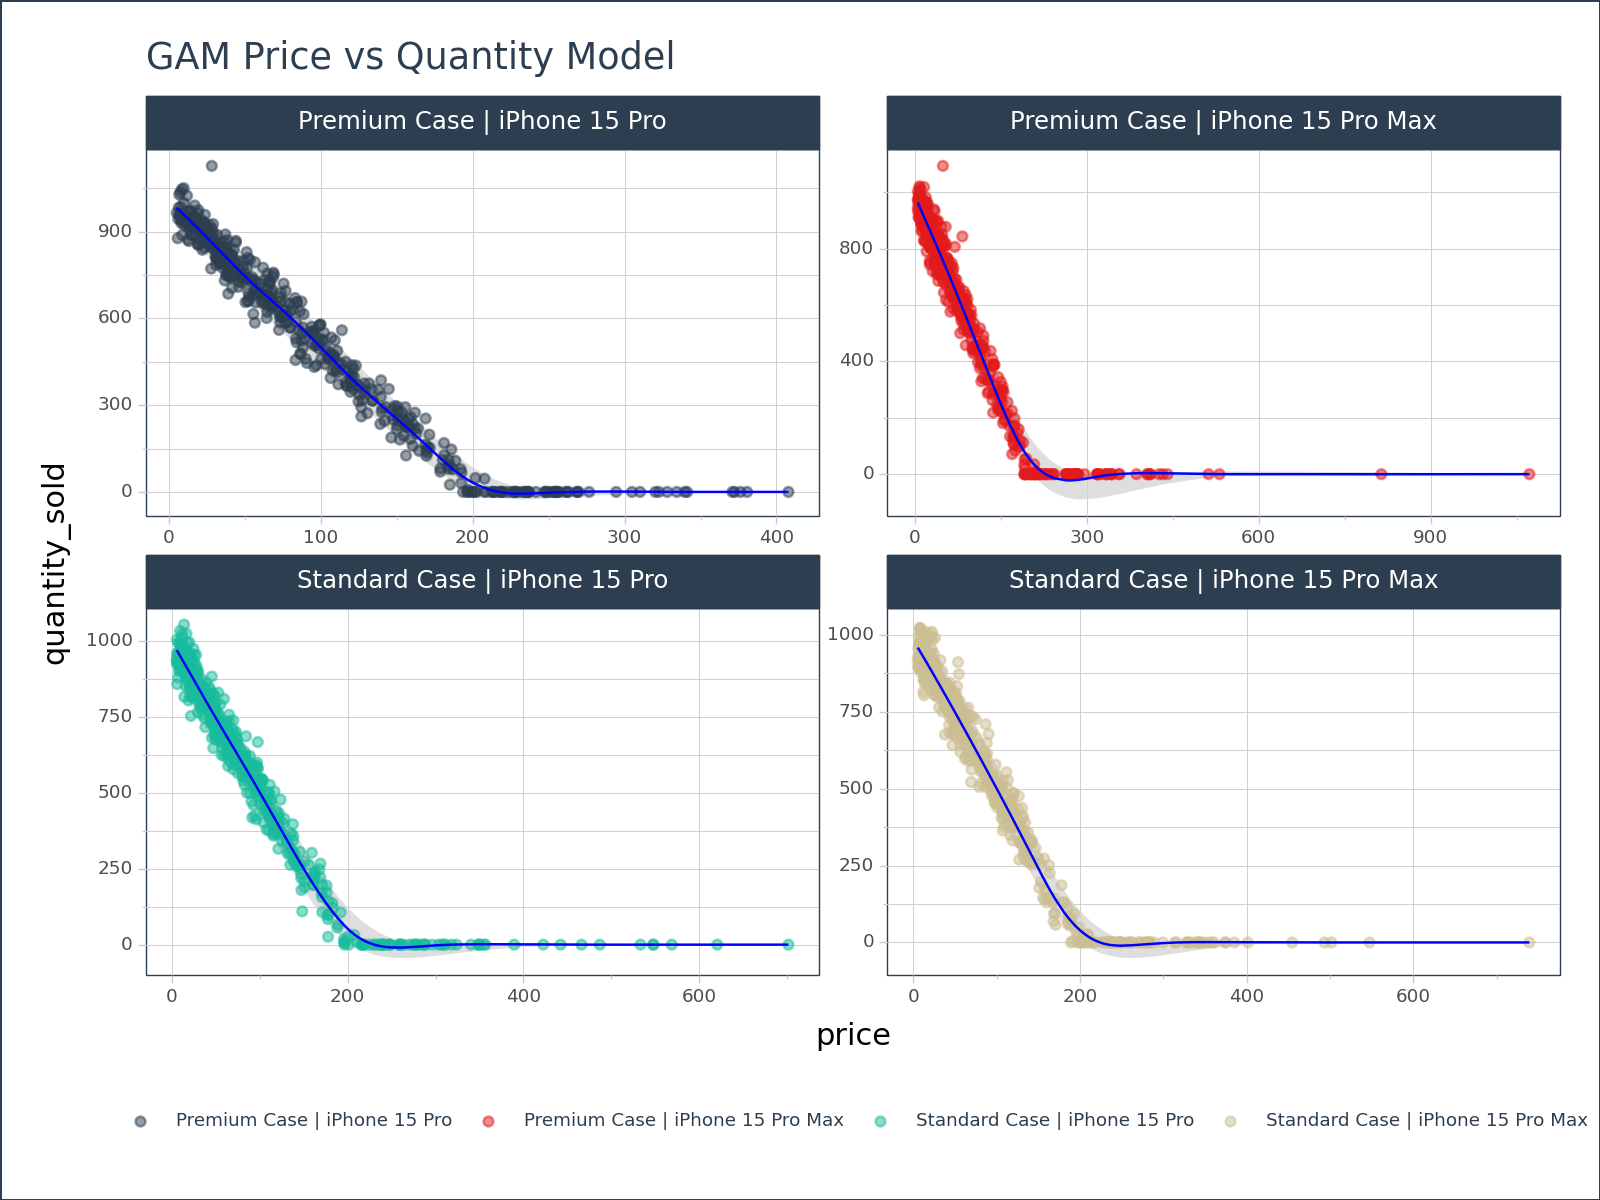

<Figure Size: (800 x 600)>

In [354]:
# Visualize the GAM Price Model Results
ggplot(
    data = all_gam_results,
    mapping = aes(x='price', y='quantity_sold', color='product', group = 'product')
  ) + \
  geom_ribbon(aes(ymax = 'pred_0.975', ymin = 'pred_0.025'), fill = '#d3d3d3', color='#FF000000', alpha=0.75, show_legend = False) + \
  geom_point(alpha=0.5) + \
  geom_line(aes(y='pred_0.5'), color = 'blue') + \
  facet_wrap('product', scales='free') + \
  labs(title = 'GAM Price vs Quantity Model') + \
  scale_color_manual(values = list(tk.palette_timetk().values())) + \
  tk.theme_timetk(width = 800, height = 600)

In [355]:
# Optimiza Price for Predicted Daily Revenue

for col in all_gam_results.columns:
  if col.startswith('pred'):
    all_gam_results['revenue_' + col] = all_gam_results['price']*all_gam_results[col]

all_gam_results['revenue_actual'] = all_gam_results['price']*all_gam_results['quantity_sold']

In [356]:
all_gam_results

,price,product,quantity_sold,pred_0.025,pred_0.5,pred_0.975,revenue_pred_0.025,revenue_pred_0.5,revenue_pred_0.975,revenue_actual
11,5.159972,Premium Case | iPhone 15 Pro Max,975,899.177439,963.161992,1033.320847,4639.730732,4969.889255,5331.907010,5030.973050
31,5.309463,Premium Case | iPhone 15 Pro Max,936,898.431487,962.468032,1032.680617,4770.188382,5110.188025,5482.979120,4969.656999
36,5.383023,Premium Case | iPhone 15 Pro Max,1003,898.064434,962.126551,1032.365528,4834.301737,5179.149603,5557.247652,5399.172331
46,5.515644,Premium Case | iPhone 15 Pro Max,948,897.402706,961.510904,1031.797385,4949.753630,5303.351614,5691.026802,5228.830281
47,5.523109,Premium Case | iPhone 15 Pro Max,969,897.365459,961.476250,1031.765402,4956.246989,5310.337860,5698.552486,5351.892347
...,...,...,...,...,...,...,...,...,...,...
9447,547.570619,Standard Case | iPhone 15 Pro,0,0.224405,-0.057999,1.657136,122.877506,-31.758353,907.399246,0.000000
9449,547.984006,Standard Case | iPhone 15 Pro,0,0.221803,-0.057490,1.651114,121.544269,-31.503785,904.784023,0.000000
9454,568.779394,Standard Case | iPhone 15 Pro,0,0.075772,-0.032548,1.356206,43.097658,-18.512561,771.381761,0.000000
9466,620.555525,Standard Case | iPhone 15 Pro,0,-0.258751,0.005267,0.724040,-160.569326,3.268745,449.306839,0.000000


In [357]:
best_50 = all_gam_results \
  .groupby('product') \
  .apply(lambda x: x[x['revenue_pred_0.5'] == x['revenue_pred_0.5'].max()].head(1)).reset_index(level=0, drop=True)

In [358]:
best_975 = all_gam_results \
  .groupby('product') \
  .apply(lambda x: x[x['revenue_pred_0.975'] == x['revenue_pred_0.975'].max()].head(1)).reset_index(level=0, drop=True)

In [359]:
best_025 = all_gam_results \
  .groupby('product') \
  .apply(lambda x: x[x['revenue_pred_0.025'] == x['revenue_pred_0.025'].max()].head(1)).reset_index(level=0, drop=True)

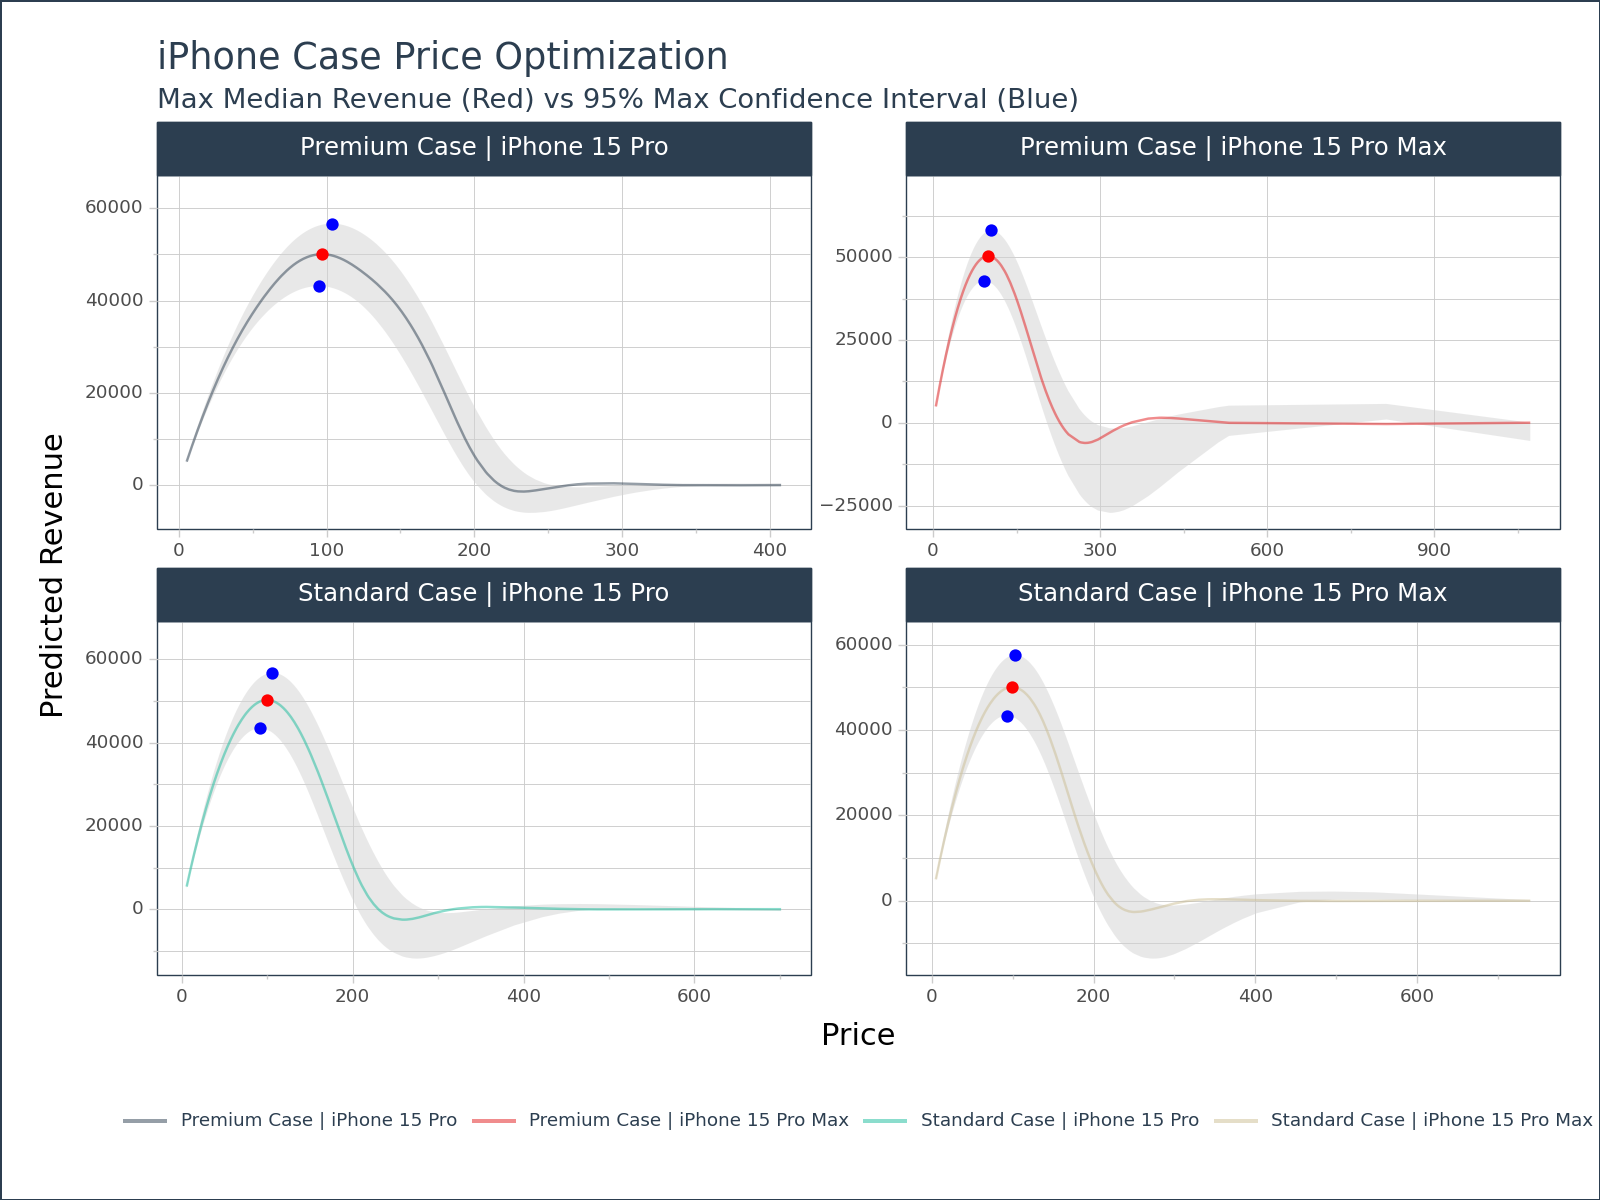

<Figure Size: (800 x 600)>

In [360]:
# Visualize the GAM Revenue Optimization Results

(
  ggplot(
      data = all_gam_results,
      mapping = aes(x='price', y='revenue_pred_0.5', color='product', group = 'product')
  ) + \
    geom_ribbon(aes(ymax = 'revenue_pred_0.975', ymin = 'revenue_pred_0.025'), fill = '#d3d3d3', color='#FF000000', alpha=0.5, show_legend = False) + \
    # Uncomment to add actual revenue points
    geom_point(aes(ymax = 'revenue_actual'),  color='#FF000000', alpha=0.5) + \
    geom_line(aes(y='revenue_pred_0.5'), alpha=0.5) + \
    geom_point(data=best_50, color='red') + \
    geom_point(data=best_975, mapping = aes(y='revenue_pred_0.975') , color='blue') + \
    geom_point(data=best_025, mapping = aes(y='revenue_pred_0.025') , color='blue') + \
    # geom_line(aes(y='pred_0.5'), color = 'blue') + \
    facet_wrap('product', scales='free') + \
    labs(
        title = 'iPhone Case Price Optimization',
        subtitle = 'Max Median Revenue (Red) vs 95% Max Confidence Interval (Blue)',
        x='Price',
        y='Predicted Revenue'
        ) + \
    scale_color_manual(values = list(tk.palette_timetk().values())) + \
    tk.theme_timetk(width = 800, height = 600)
)

In [361]:
best_50[['product', 'price', 'revenue_pred_0.5', 'revenue_pred_0.025', 'revenue_pred_0.975']]

,product,price,revenue_pred_0.5,revenue_pred_0.025,revenue_pred_0.975
5764,Premium Case | iPhone 15 Pro,97.082380,50047.286170,43102.439968,56446.291211
5842,Premium Case | iPhone 15 Pro Max,98.970541,50327.159131,42648.668196,57872.429214
5868,Standard Case | iPhone 15 Pro,99.969085,50213.136748,43073.193754,56519.943468
5865,Standard Case | iPhone 15 Pro Max,99.904591,50053.092114,43115.883788,57493.274740


# BUSINESS INSIGHTS

###### 1. The GAMs show that the optimal price is at the ends of the price range for: Premium Case | iPhone 15 Pro Max Standard Case | iPhone 15 Pro Max
###### This suggests that the company should consider a price increase for these models

###### 2. The GAMS show that the optimal price is in the middle of the price range for Premium Case | iPhone 15 Pro and Standard Case | iPhone 15 Pro
###### This suggest that the company should consider a price that is close to the red dots for these products

# MODELING GAMS WITH EVENTS:

## Essentially the same process as above, but we need to filter out the "No Promo" events

## Gets a little tricky because of limited data points for each event

In [362]:
#Keep the entire data as data_filtered
data_filtered = data.query('event != "No Promo"')


In [363]:
data_filtered

,price,quantity_sold,product,event,is_event,revenue
0,5.038587,1028,Premium Case | iPhone 15 Pro Max,Black Friday,1,5179.667347
1,5.047327,1020,Premium Case | iPhone 15 Pro Max,New iPhone,1,5148.273308
2,5.054122,922,Standard Case | iPhone 15 Pro,Black Friday,1,4659.900336
3,5.057938,986,Premium Case | iPhone 15 Pro Max,The Big Game,1,4987.127322
4,5.060821,962,Premium Case | iPhone 15 Pro,Black Friday,1,4868.509796
...,...,...,...,...,...,...
9500,55.809201,898,Premium Case | iPhone 15 Pro Max,Black Friday,1,50116.662441
9502,87.773496,906,Standard Case | iPhone 15 Pro Max,New iPhone,1,79522.787188
9504,83.376840,813,Premium Case | iPhone 15 Pro Max,Black Friday,1,67785.370528
9505,86.313284,875,Standard Case | iPhone 15 Pro,New iPhone,1,75524.123271


In [364]:
# Create a list of unique products and events
unique_products = data_filtered['product'].unique()
events_only_gam_results = pd.DataFrame()


In [365]:
# Loop through each product
for product in unique_products:

  #Filter data for the current product and event
  product_event_data = data_filtered[(data_filtered['product'] == product)]

  if len(product_event_data) ==0:
    continue # skip to next iteration if no data for current product-event combination

  X = product_event_data[['price', 'event']]
  y = product_event_data['quantity_sold']

  # NEW: Encode the event columm
  le = LabelEncoder()
  X['event'] = le.fit_transform(X['event'])

  quantiles = [0.025, 0.5, 0.975]

  for q in quantiles:

    #NEW: use f(1) to indicate that the event column is categorical
    gam = GAM(l(0) + f(1))

    gam.fit(X, y)
    gam_results[f"pred_{q}"] = gam.predict(X)

  # Store the results in a dataframe with index that matches the original data
  predictions_gam = pd.DataFrame(gam_results).set_index(X.index)

  # Concatenate the results column-wise with the original data
  predictions_gam_df = pd.concat([product_event_data[['price', 'product', 'event', 'quantity_sold']], predictions_gam], axis =1)

  # Concatenate results row-wise
  events_only_gam_results = pd.concat([events_only_gam_results, predictions_gam_df], axis=0)

In [366]:
events_only_gam_results

,price,product,event,quantity_sold,pred_0.025,pred_0.5,pred_0.975
0,5.038587,Premium Case | iPhone 15 Pro Max,Black Friday,1028,849.391819,849.391819,849.391819
1,5.047327,Premium Case | iPhone 15 Pro Max,New iPhone,1020,831.181249,831.181249,831.181249
3,5.057938,Premium Case | iPhone 15 Pro Max,The Big Game,986,854.730712,854.730712,854.730712
5,5.075814,Premium Case | iPhone 15 Pro Max,Christmas,984,846.106868,846.106868,846.106868
16,5.213327,Premium Case | iPhone 15 Pro Max,New iPhone,997,830.677545,830.677545,830.677545
...,...,...,...,...,...,...,...
9489,31.115823,Standard Case | iPhone 15 Pro Max,The Big Game,1188,754.663583,754.663583,754.663583
9494,49.000786,Standard Case | iPhone 15 Pro Max,Black Friday,1108,698.503229,698.503229,698.503229
9497,56.744966,Standard Case | iPhone 15 Pro Max,The Big Game,906,685.129464,685.129464,685.129464
9499,60.709663,Standard Case | iPhone 15 Pro Max,The Big Game,856,674.372894,674.372894,674.372894


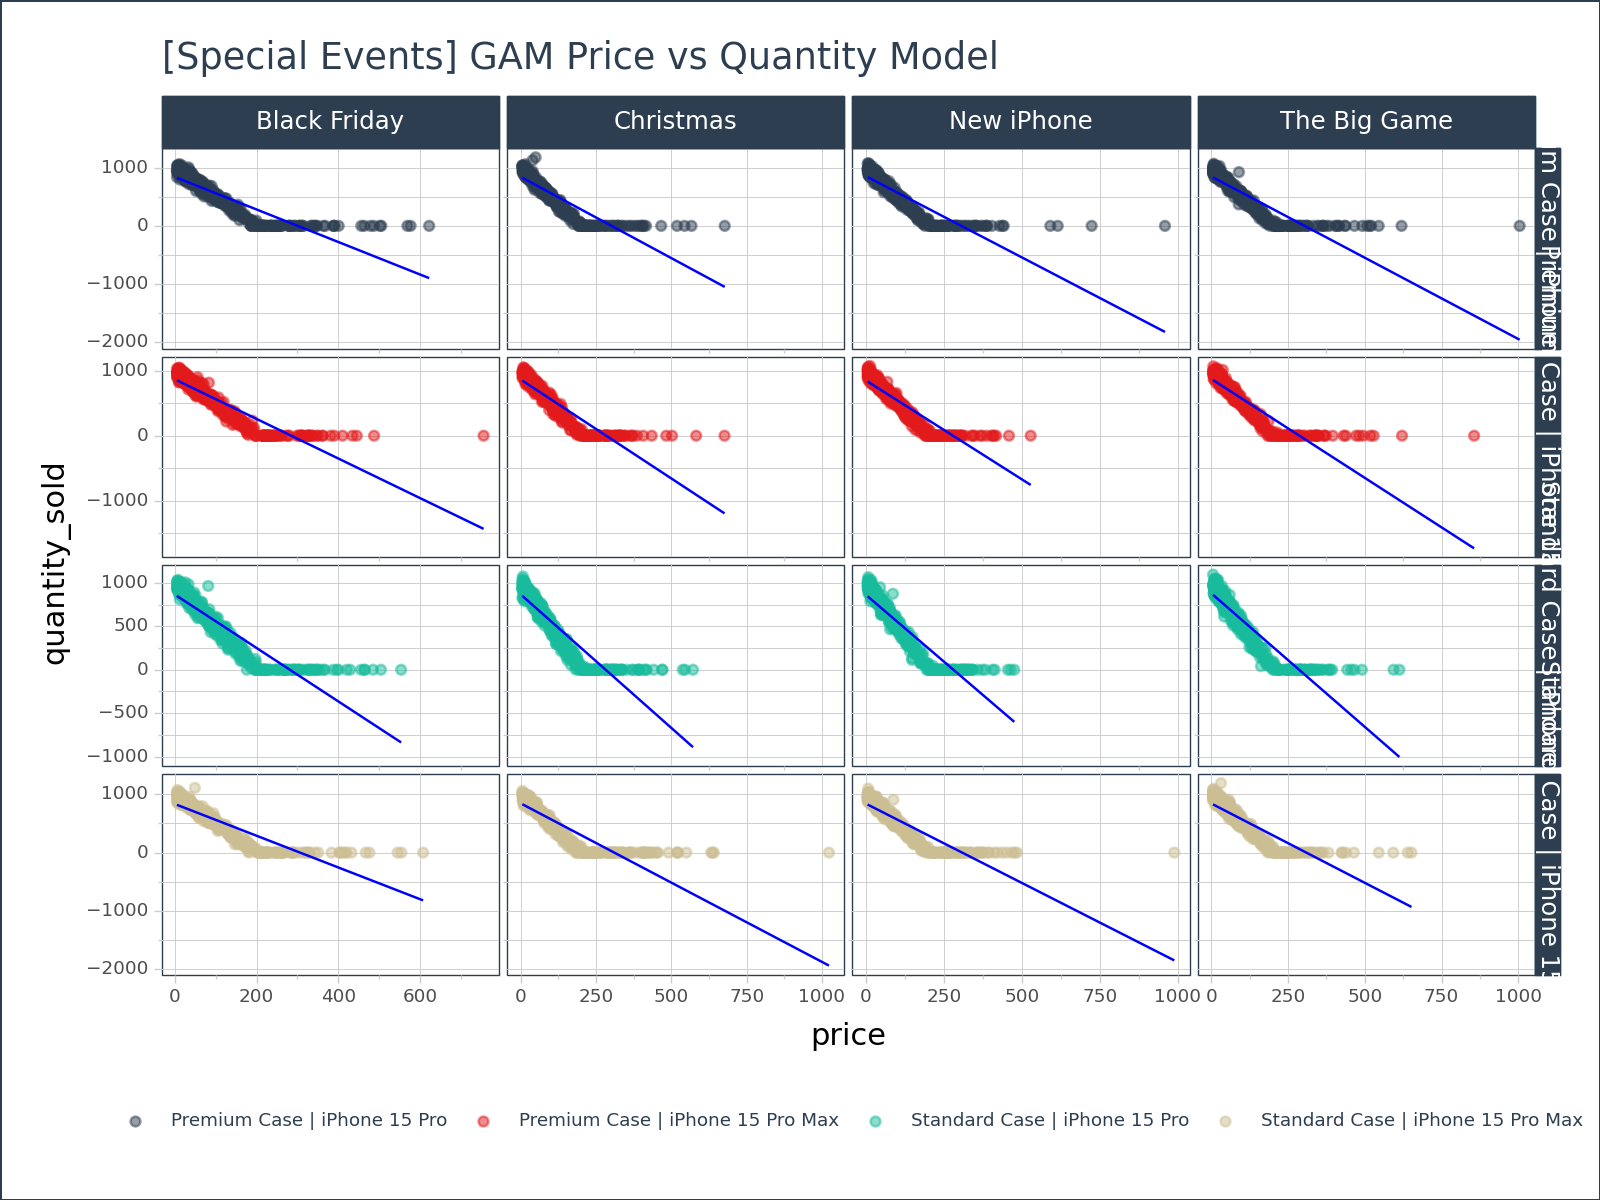

<Figure Size: (800 x 600)>

In [367]:
# Visualize the GAM Price Model Results
ggplot(
    data = events_only_gam_results,
    mapping = aes(x='price', y='quantity_sold', color='product'),
  ) + \
  geom_point(alpha=0.5) + \
  geom_line(aes(y='pred_0.5'), color = 'blue') + \
  facet_grid('product ~ event', scales='free') + \
  labs(title = '[Special Events] GAM Price vs Quantity Model') + \
  scale_color_manual(values = list(tk.palette_timetk().values())) + \
  tk.theme_timetk(width = 800, height = 600)

In [368]:
# Optimiza Price for Predicted Daily Revenue

for col in events_only_gam_results.columns:
  if col.startswith('pred'):
    events_only_gam_results['revenue_' + col] = events_only_gam_results['price'] + events_only_gam_results[col]



In [369]:
events_only_gam_results

,price,product,event,quantity_sold,pred_0.025,pred_0.5,pred_0.975,revenue_pred_0.025,revenue_pred_0.5,revenue_pred_0.975
0,5.038587,Premium Case | iPhone 15 Pro Max,Black Friday,1028,849.391819,849.391819,849.391819,854.430406,854.430406,854.430406
1,5.047327,Premium Case | iPhone 15 Pro Max,New iPhone,1020,831.181249,831.181249,831.181249,836.228576,836.228576,836.228576
3,5.057938,Premium Case | iPhone 15 Pro Max,The Big Game,986,854.730712,854.730712,854.730712,859.788651,859.788651,859.788651
5,5.075814,Premium Case | iPhone 15 Pro Max,Christmas,984,846.106868,846.106868,846.106868,851.182682,851.182682,851.182682
16,5.213327,Premium Case | iPhone 15 Pro Max,New iPhone,997,830.677545,830.677545,830.677545,835.890872,835.890872,835.890872
...,...,...,...,...,...,...,...,...,...,...
9489,31.115823,Standard Case | iPhone 15 Pro Max,The Big Game,1188,754.663583,754.663583,754.663583,785.779407,785.779407,785.779407
9494,49.000786,Standard Case | iPhone 15 Pro Max,Black Friday,1108,698.503229,698.503229,698.503229,747.504015,747.504015,747.504015
9497,56.744966,Standard Case | iPhone 15 Pro Max,The Big Game,906,685.129464,685.129464,685.129464,741.874430,741.874430,741.874430
9499,60.709663,Standard Case | iPhone 15 Pro Max,The Big Game,856,674.372894,674.372894,674.372894,735.082556,735.082556,735.082556


In [370]:
best_50 = events_only_gam_results \
  .groupby(['product', 'event']) \
  .apply(lambda x: x[x['revenue_pred_0.5'] == x['revenue_pred_0.5'].max()].head(1)).reset_index(level=0, drop=True)

In [371]:
best_975 = events_only_gam_results \
  .groupby(['product', 'event']) \
  .apply(lambda x: x[x['revenue_pred_0.975'] == x['revenue_pred_0.975'].max()].head(1)).reset_index(level=0, drop=True)

In [372]:
best_025 = events_only_gam_results \
  .groupby(['product', 'event']) \
  .apply(lambda x: x[x['revenue_pred_0.025'] == x['revenue_pred_0.025'].max()].head(1)).reset_index(level=0, drop=True)

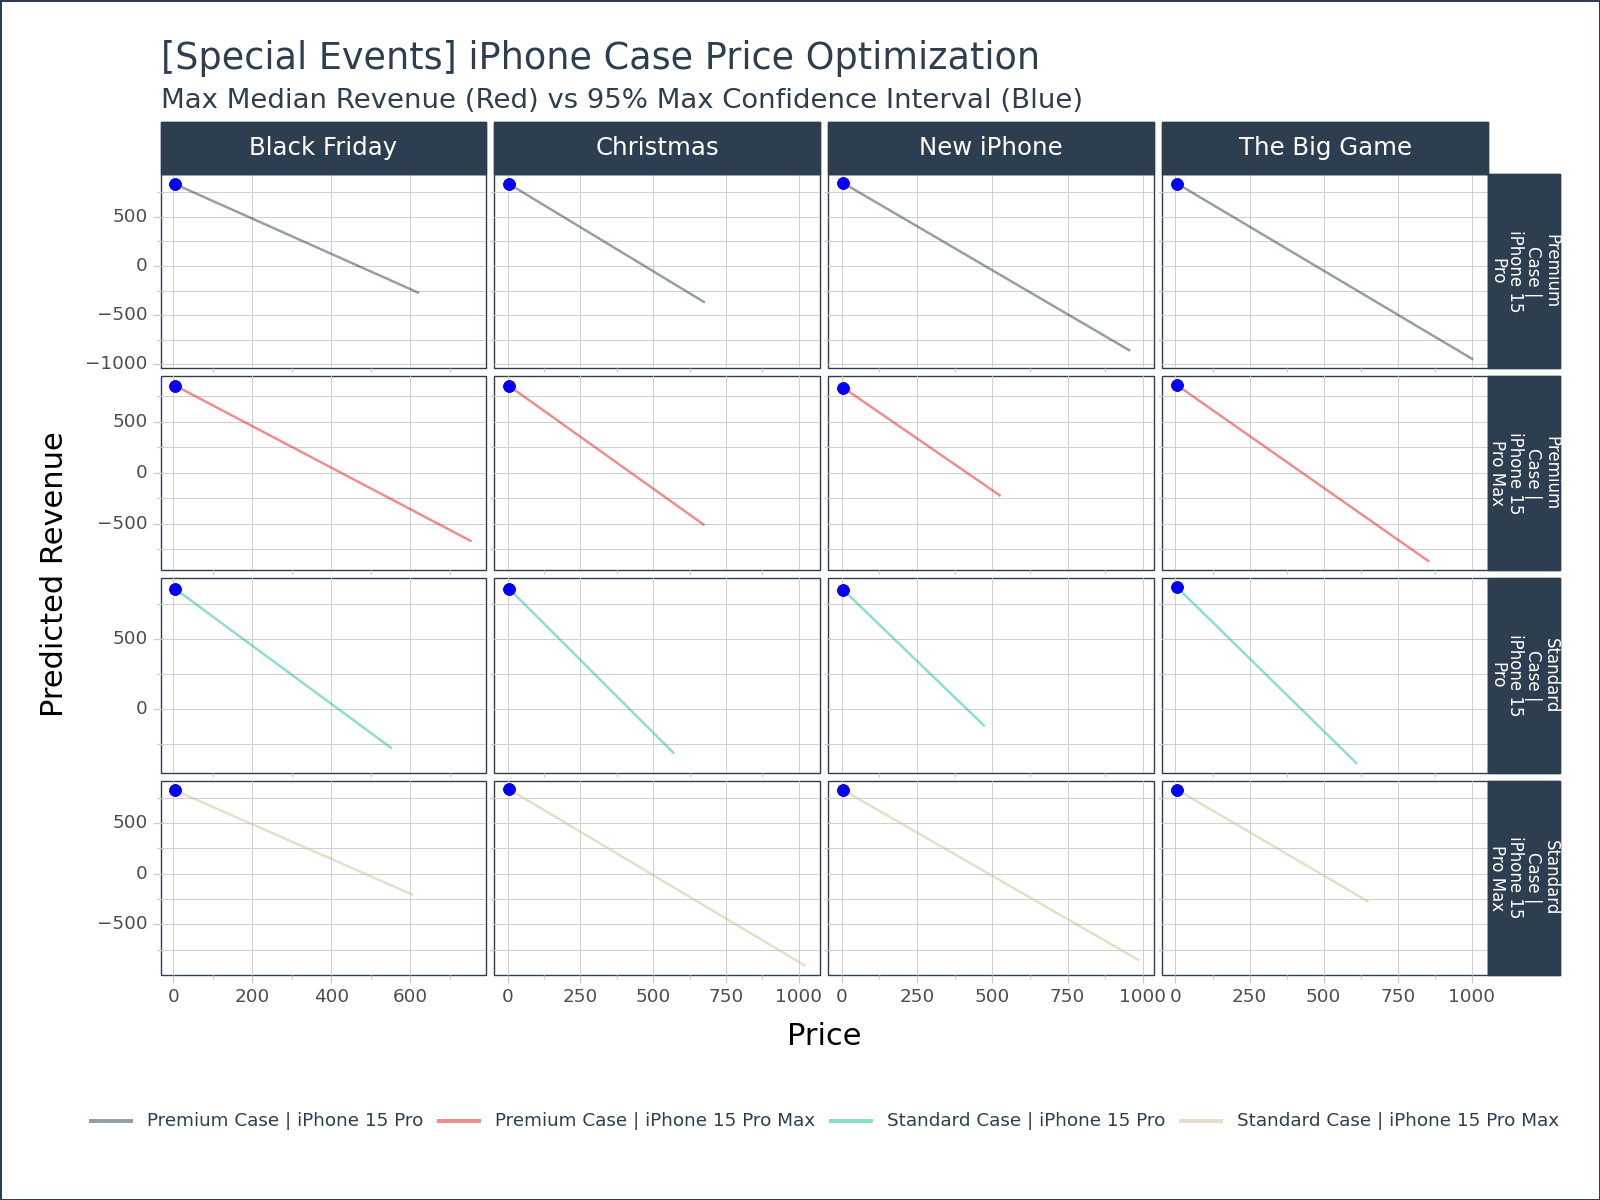

<Figure Size: (800 x 600)>

In [385]:
# Visualize the GAM Revenue Optimization Results

# Define the wrap function
def wrap_label(label, width=10):
  return '\n'.join(textwrap.wrap(label, width=width))


ggplot(
    data = events_only_gam_results,
    mapping = aes(x='price', y='revenue_pred_0.5', color='product', group = 'product')
) + \
  geom_line(alpha=0.5) + \
  geom_point(data=best_50, color='red') + \
  geom_point(data=best_975, mapping = aes(y='revenue_pred_0.975') , color='blue') + \
  geom_point(data=best_025, mapping = aes(y='revenue_pred_0.025') , color='blue') + \
  facet_grid('product ~ event', scales='free', labeller = labeller(product=wrap_label)) + \
  labs(
      title = '[Special Events] iPhone Case Price Optimization',
      subtitle = 'Max Median Revenue (Red) vs 95% Max Confidence Interval (Blue)',
      x='Price',
      y='Predicted Revenue'
      ) + \
  scale_color_manual(values = list(tk.palette_timetk().values())) + \
  tk.theme_timetk(width = 800, height = 600) + \
  theme(strip_text_y=element_text(size=6))


In [386]:
best_50

,,price,product,event,quantity_sold,pred_0.025,pred_0.5,pred_0.975,revenue_pred_0.025,revenue_pred_0.5,revenue_pred_0.975
event,,,,,,,,,,,
Black Friday,4,5.060821,Premium Case | iPhone 15 Pro,Black Friday,962,825.458573,825.458573,825.458573,830.519394,830.519394,830.519394
Christmas,9,5.118859,Premium Case | iPhone 15 Pro,Christmas,1022,826.990667,826.990667,826.990667,832.109526,832.109526,832.109526
New iPhone,21,5.242602,Premium Case | iPhone 15 Pro,New iPhone,986,837.810403,837.810403,837.810403,843.053005,843.053005,843.053005
The Big Game,29,5.277952,Premium Case | iPhone 15 Pro,The Big Game,899,832.635778,832.635778,832.635778,837.913730,837.913730,837.913730
Black Friday,0,5.038587,Premium Case | iPhone 15 Pro Max,Black Friday,1028,849.391819,849.391819,849.391819,854.430406,854.430406,854.430406
Christmas,5,5.075814,Premium Case | iPhone 15 Pro Max,Christmas,984,846.106868,846.106868,846.106868,851.182682,851.182682,851.182682
New iPhone,1,5.047327,Premium Case | iPhone 15 Pro Max,New iPhone,1020,831.181249,831.181249,831.181249,836.228576,836.228576,836.228576
The Big Game,3,5.057938,Premium Case | iPhone 15 Pro Max,The Big Game,986,854.730712,854.730712,854.730712,859.788651,859.788651,859.788651
Black Friday,2,5.054122,Standard Case | iPhone 15 Pro,Black Friday,922,850.195318,850.195318,850.195318,855.249440,855.249440,855.249440



##### BUSINESS INSIGHTS:

###### Events have a significant impact on price optimization.
###### Prices should be optimized for each special event (e.g. Black Friday, Christmas).
###### For demand decreasing events (e.g. New iPhone Model comes out), prices should be lowered to maximize revenue based on historical data.